# Mini Talk Numpy

In [1]:
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.misc
import numpy as np
import matplotlib as mpl

%matplotlib inline

# Vetor

De maneira mais formal, um vetor é definido como sendo uma classe de equipolência de segmentos de reta orientados de $\mathbb{V}^n$ , em que $\mathbb{V}^n$ representa um espaço vetorial de n dimensões. Assim sendo, em um espaço vetorial de 3 dimensões ($\mathbb{V}^3$), cada vetor será dotado de três coordenadas, comumente denominadas x, y e z (<https://pt.wikipedia.org/wiki/Vetor_(matem%C3%A1tica)>).

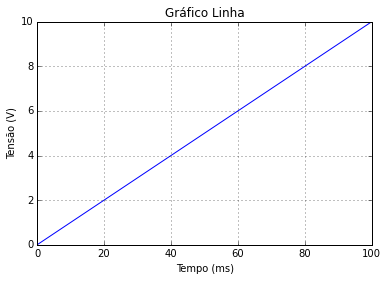

In [2]:
# vetor com 2 elementos
line_y = np.linspace(0, 10, 100)
line_t = np.linspace(0, 100, 100)

plt.grid()
plt.title('Gráfico Linha')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')
plt.plot(line_t, line_y)
plt.show()

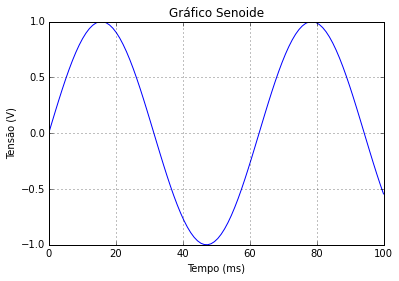

In [3]:
plt.grid()
plt.title('Gráfico Senoide')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')
plt.plot(line_t, np.sin(line_y))
plt.show()

In [4]:
_x = lambda t: \
    np.sin(4*np.pi*t.astype(complex))

_y = lambda t: \
    np.sin(5*np.pi*t.astype(complex))

t = np.linspace(-1, 1, 100000)

x = _x(t)
y = _y(t)

/home/ivan/env/py/py35/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


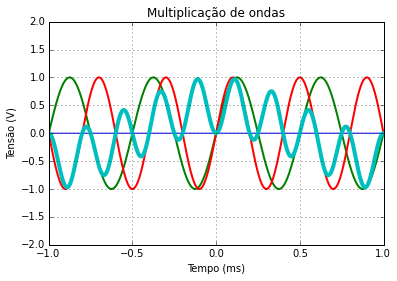

In [5]:
plt.plot(t, np.zeros(t.size), linewidth=1)
plt.plot(t, _x(t), linewidth=2)
plt.plot(t, _y(t), linewidth=2)
plt.plot(t, _x(t) * _y(t), linewidth=4)

plt.axis([-1,1, -2, 2])
plt.title('Multiplicação de ondas')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.show()

### Inner Product / Dot Product

$\left\langle \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix},\begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix} \right\rangle := x^\text{T} y = \sum_{i=1}^n x_i y_i = x_1 y_1 + \cdots + x_n y_n,$

In [6]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])

print('Produto Interno <v1, v2> =', np.dot(v1, v2))

Produto Interno <v1, v2> = 0


## Estatística


Com numpy é possível aplicar alguns cálculos estatísticos (<http://docs.scipy.org/doc/numpy/reference/routines.statistics.html>). Para necessidades mais específicas é possível utilizar o statsmodels (<http://statsmodels.sourceforge.net/>).

Por exemplo, imagine que você queira ter uma avaliação geral dos seus gastos mensais. Vamos considerar os seguintes gastos:

* Aluguel: 1000,00;
* Energia elétrica: 80,00;
* Água: 60,00;
* Internet: 80,00;
* Telefone: 30,00;
* Mercado: 500,00.

In [7]:
gastos_mes = np.array([1000, 80, 60, 80, 30, 500])

print("Número de contas pagas por mês:", gastos_mes.size)
print("Total de gastos mensais:", gastos_mes.sum())

Número de contas pagas por mês: 6
Total de gastos mensais: 1750


Vamos também analisar os gastos nos últimos 12 meses da conta de energia elétrica:

* Janeiro: 50,00;
* Fevereiro: 70,00;
* Março: 60,00;
* Abril: 55,00;
* Maio: 62,00;
* Junho: 70,00;
* Julho: 73,00;
* Agosto: 72,00;
* Setembro: 68,00;
* Outubro: 75,00;
* Novembro: 78,00;
* Dezembro: 80,00.

In [8]:
gastos_eletrico = np.array([
    50, 70, 60, 55, 62, 70, 73, 72, 68, 75, 78, 80
])

print("Número meses analisados:", gastos_eletrico.size)
print("Total de gastos no período:", gastos_eletrico.sum())
print("Média mensal do período:", gastos_eletrico.mean())
print("Desvio Padrão da amostra:", gastos_eletrico.std(ddof=1))

Número meses analisados: 12
Total de gastos no período: 813
Média mensal do período: 67.75
Desvio Padrão da amostra: 9.21584603722


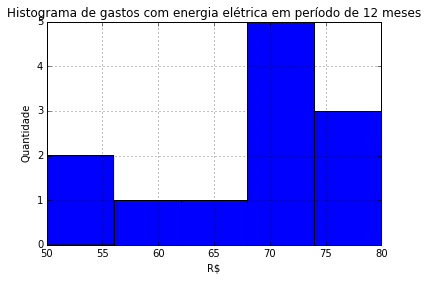

In [9]:
plt.hist(gastos_eletrico, bins=5)
plt.title('Histograma de gastos com energia elétrica em período de 12 meses')
plt.xlabel('R$')
plt.ylabel('Quantidade')
plt.grid()
plt.show()
plt.show()

## Matriz

Em matemática, uma matriz $m \times n$ é uma tabela de m linhas e n colunas de símbolos sobre um conjunto, normalmente um corpo, F, representada sob a forma de um quadro. As matrizes são muito utilizadas para a resolução de sistemas de equações lineares e transformações lineares.

Uma matriz é um conjunto retangular de números, símbolos ou expressões, organizados em linhas e colunas. Cada um dos itens de uma matriz é chamado de elemento (<https://pt.wikipedia.org/wiki/Matriz_(matem%C3%A1tica)>).

Na documentação do numpy está disponível os métodos que podem ser utilizados com as matrizes: <http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html>

In [10]:
m1 = np.matrix('1 2; 3 4')
m2 = np.matrix([[2, 3], [5, 7]])

print('m1')
print(m1)

print('m2')
print(m2)

m1
[[1 2]
 [3 4]]
m2
[[2 3]
 [5 7]]


## Manipulação de Imagem

(512, 512)


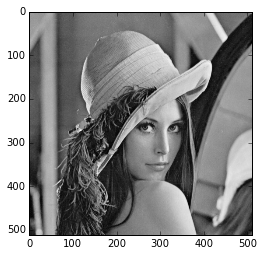

In [11]:
lena = scipy.misc.lena()
print(lena.shape)

plt.gray()
plt.imshow(lena)
plt.show()

(52, 52)


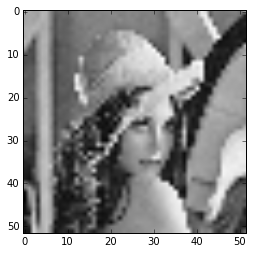

In [12]:
lena_1 = lena.copy()[::10,::10]
print(lena_1.shape)

plt.gray()
plt.imshow(lena_1)
plt.show()

(512, 512)


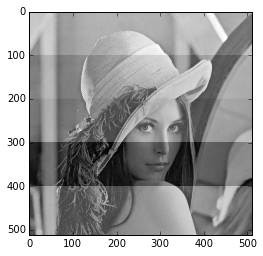

In [13]:
lena_2 = lena.copy()
print(lena_2.shape)

lena_2[0:100,:] += 50
lena_2[100:200,:] += 15
lena_2[300:400,:] -= 80

plt.gray()
plt.imshow(lena_2)
plt.show()

(512, 512)


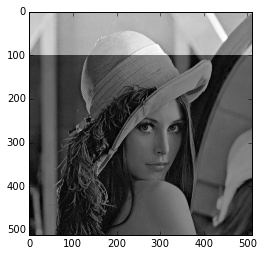

In [14]:
lena_3 = lena.copy()
print(lena_3.shape)

lena_3[100:,:] -= 150

plt.gray()
plt.imshow(lena_3)
plt.show()

(512, 512)


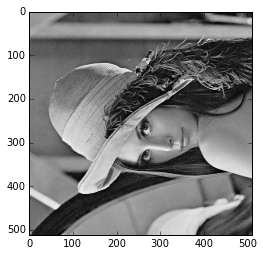

In [15]:
# Transposta da matriz
lena_4 = lena.copy()
print(lena_4.shape)

plt.gray()
plt.imshow(lena_4.T)
plt.show()

## SciPyLA Google Group

<https://groups.google.com/forum/#!forum/scipyla>

## Contato

Email: ivan.ogasawara@gmail.com
